# Dataset Information
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

|Variable||Description  |
|--------||-------------|
|Item_Identifier||	Unique product ID|
|Item_Weight|	|Weight of product|
|Item_Fat_Content|	|Whether the product is low fat or not|
|Item_Visibility|	|The % of total display area of the product in a store allocated|
|Item_Type|	|The category to which the product belongs|
|Item_MRP|	|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	|Unique store ID|
|Outlet_Establishment_Year|	|The year in which store was established|
|Outlet_Size|	|The size of the store in terms of ground area covered|
|Outlet_Location_Type|	|The type of city in which the store is located|
|Outlet_Type|	|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [2]:
#Loading Dataset
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Description about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Some Statistical info about the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# Checking unique values in the dataset
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [3]:
# Lets check for missing values in our dataset
df.isnull().sum()
#So there are 1463 missing values in Item_Weight column and 2410 missing values in Outlet_Size.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

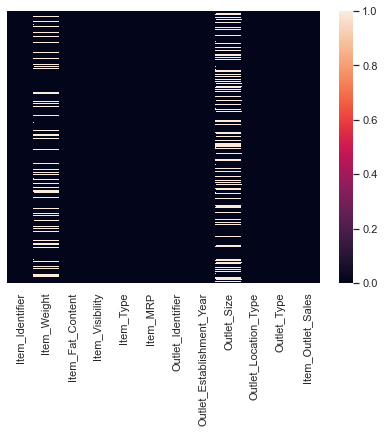

In [18]:
plt.subplots(figsize=(7,5))
sns.heatmap(df.isna(),yticklabels=False)
#The white marks show presence of null/missing values. We have quite a few null values in these two columns
#that will need to be sorted out. We shall look into that a little later.
#Let us first visualise the various data starting from Item_Weight.

# Data Visualization
## A) Item Weight

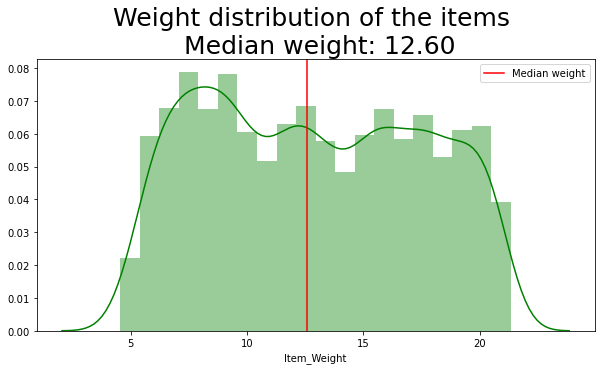

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Weight'].dropna(),color='green')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df['Item_Weight'].dropna().median()),size=25)
plt.axvline(df['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

As we can see from the above distribution plot, the curve platueus over a large range of weights. Hence, it is better if we replace the missing values with the median value as it's not affected by outliers. 

# b) Item_Fat_Content

In [3]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

We see bit of an issue in this column. Technically, we have only two unique values which are either low fat or regular. However, since the data entry has been done in separate ways, it is showing up as 5 unique values. Let us take care of it.

In [4]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})


We have solved the issue. Let us now visualise the number of items of each fat content.

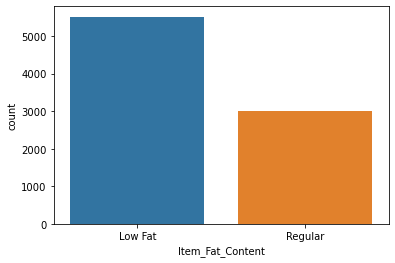

In [8]:
sns.countplot(df["Item_Fat_Content"])

We see that there are more items are of low fat than regular. So we can say that majority of customers are health conscious and prefer food with lower fat rating.

# c) Item Visibility

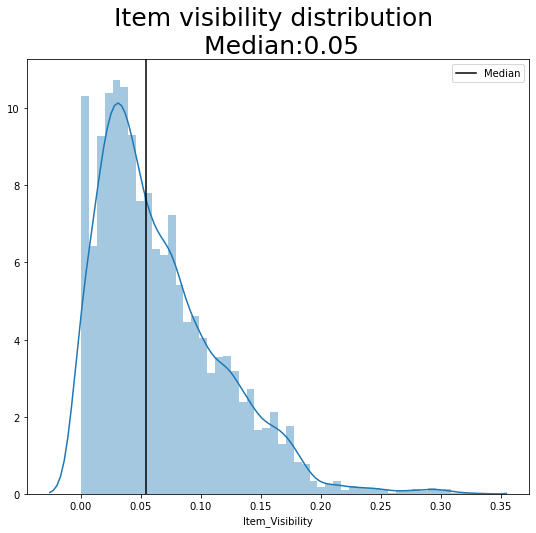

In [5]:
plt.figure(figsize=(9,8))
sns.distplot(df['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(df['Item_Visibility'].median()),size=25)
plt.axvline(df['Item_Visibility'].median(),color='black',label='Median')
plt.legend()


((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.32111501, 0.32578081,
         0.32839095])),
 (0.04934877527401504, 0.06613202877895105, 0.9560728731678174))

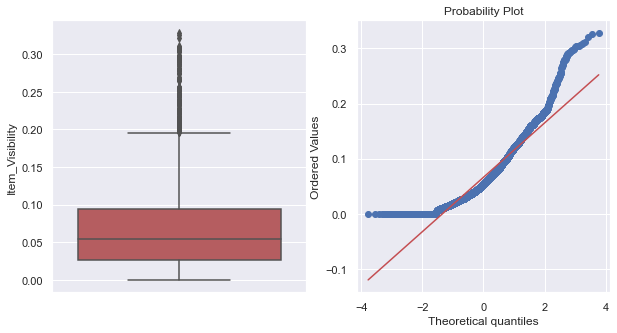

In [9]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(df['Item_Visibility'],orient='v',ax=ax1,color='r')
ax2=fig3.add_subplot(122)
stat.probplot(df['Item_Visibility'],plot=ax2) # Q-Q Plot

As we can see, values above 0.19 visibility are outliers. Presence of outliers don't do well with machine learning algorithms. Hence, we need to remove the outliers and try to form a normal distribution. For conversion we will use square root transformation to convert the data into a approx normal distribution.

In [5]:
df=df[(df["Item_Visibility"]<0.19)&(df["Item_Visibility"]!=0)]

In [8]:
df["Item_Visibility"]=np.sqrt(df["Item_Visibility"]) #Square root transformation

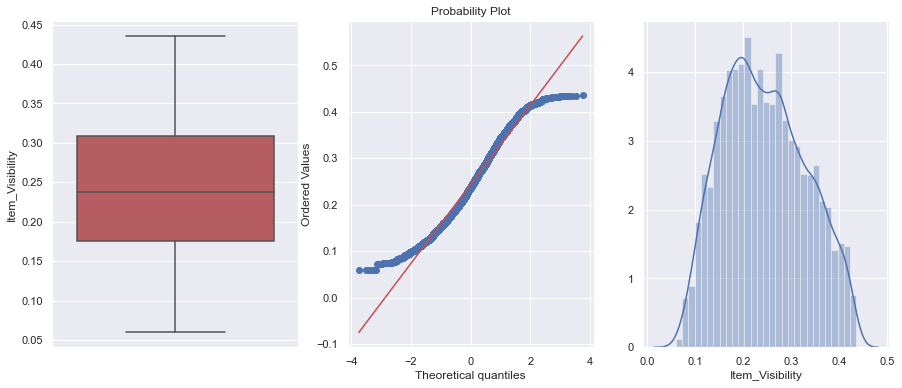

In [9]:
fig3=plt.figure(figsize=(15,6))
ax1=fig3.add_subplot(131)
sns.boxplot(df['Item_Visibility'],orient='v',ax=ax1,color='r')
ax2=fig3.add_subplot(132)
stat.probplot(df['Item_Visibility'],plot=ax2) 
ax3=fig3.add_subplot(133)
sns.distplot(df["Item_Visibility"])

# d) Item_Outlet_Sales

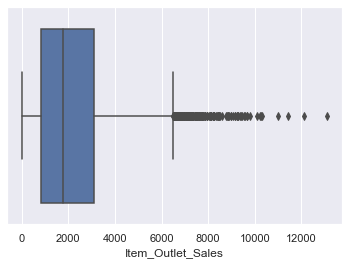

In [16]:
sns.boxplot(x="Item_Outlet_Sales",data=df)

In [5]:
df=df[df["Item_Outlet_Sales"]<=6400] #Removing Outliers

# e)Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

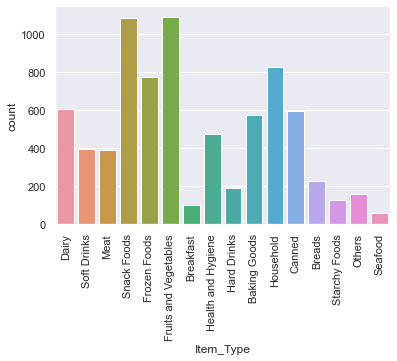

In [30]:
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

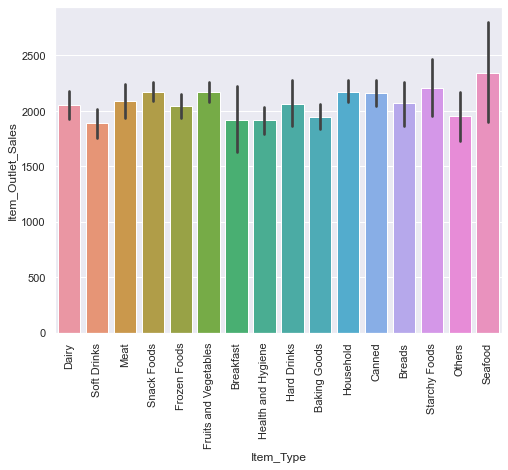

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)
plt.xticks(rotation=90)

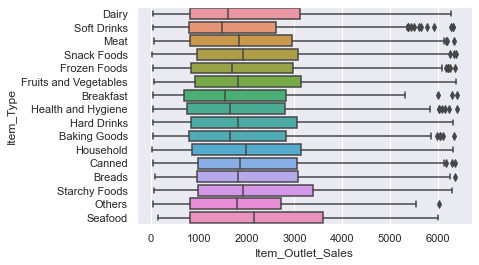

In [32]:
sns.boxplot(x="Item_Outlet_Sales",y="Item_Type",data=df)

# f) MRP

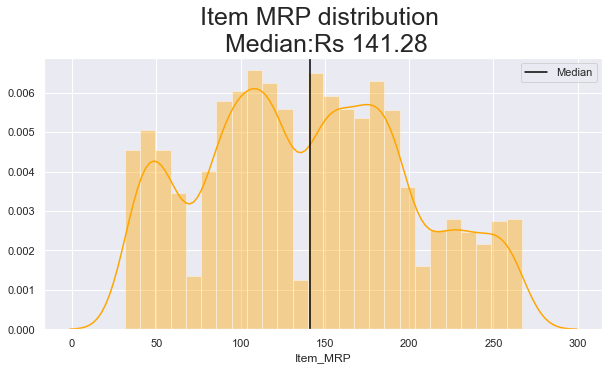

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:Rs {0:.2f}'.format(df['Item_MRP'].median()),size=25)
plt.axvline(df['Item_MRP'].median(),color='black',label='Median')
plt.legend()

As we can see, we don't have any clear distribution of the prices here. The distribution is multi modal in nature with mulitple peaks.

The graph basically:

* we have fair number of products whose prices range from Rs 25-75.
* we have fair number of products in the Rs 80-120  range. Infact, it is the highest.
* the products increase again from Rs 150-200 Rs range.
* There are fair number of products from Rs 220-240  range aswell.
<br>Let us try to check the boxplots of how MRPs change with item products.

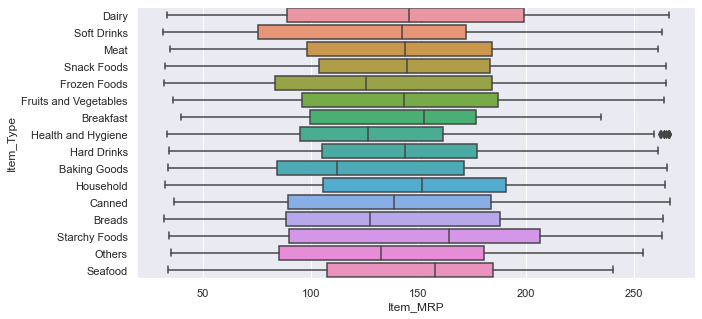

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Item_Type',x='Item_MRP',data=df)

From the above plot, we see which item types have high MRPs. Seafood and Starchy foods have a higher median price than the rest.

# g) Outlet_Identifier

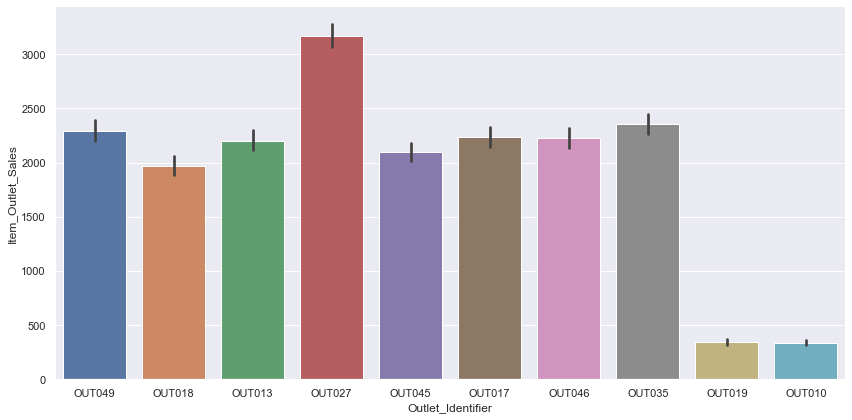

In [35]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',aspect=2,height=6,data=df,kind='bar')

All the outlet have fairly good sales with OUT027 being the highest. And OUT019 and OUT010 lagging behind in sales.

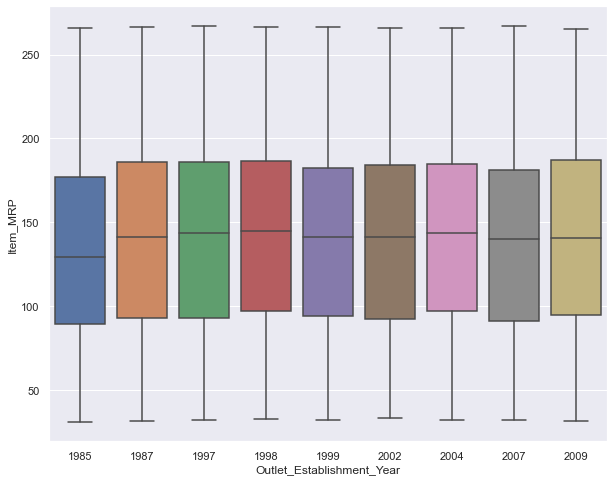

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_MRP',data=df)

As we can see, no matter how old the shops are, the median prices of items sold is nearly the same. Hence, the sellers have no bias to sell more expensive products from older or newer markets.

Let us now check if the establishment year has anything to do with number of output sales.

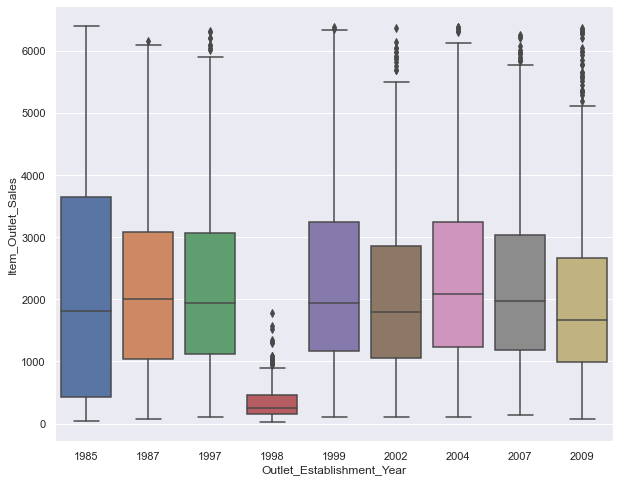

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=df)

As it can be seen, the sales reported by the older stores is higher than the relatively newer stores
<br>(except for the 1998 established store)

In [6]:
df1=df[((df.Outlet_Establishment_Year==2009)&(df.Item_Outlet_Sales>5100))|((df.Outlet_Establishment_Year==2007)&(df.Item_Outlet_Sales>5800))|((df.Outlet_Establishment_Year==2002)&(df.Item_Outlet_Sales>5500)|((df.Outlet_Establishment_Year==1998)&(df.Item_Outlet_Sales>950)))|((df.Outlet_Establishment_Year==1997)&(df.Item_Outlet_Sales>5900))]
l=list(df1.index)
df.drop(l,axis=0,inplace=True) #Removing Outliers

Text(0.5, 1.0, 'Average sales of store')

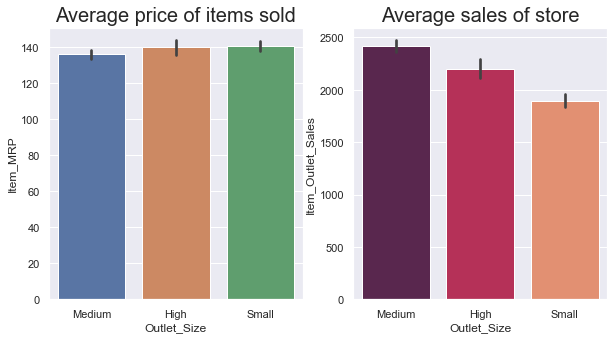

In [39]:
fig8=plt.figure(figsize=(10,5))
ax1=fig8.add_subplot(121)
sns.barplot('Outlet_Size','Item_MRP',data=df,ax=ax1)

ax2=fig8.add_subplot(122)
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df,ax=ax2,palette='rocket')

ax1.set_title('Average price of items sold',size=20)
ax2.set_title('Average sales of store',size=20)

The average price of items sold in each outlet store size is nearly the same which is Rs 140. However, The medium stores seem to sell better followed by high sized and then small sized stores.

# h) Outlet_Type

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

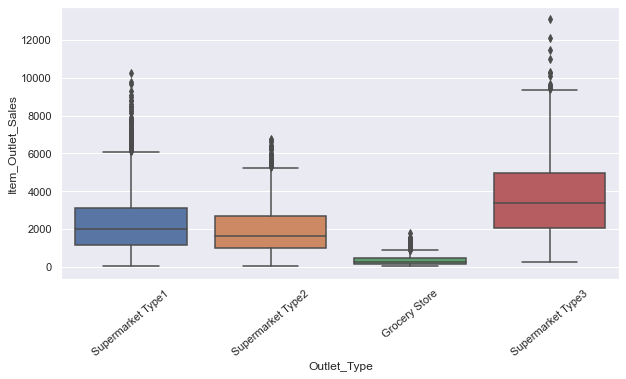

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)
plt.xticks(rotation=40)

Supermarket Type3 has the highest amount contributing to the sales . Supermarket Type1 and Type2 are fairly good. Grocery Store has lowest sales.So It can be said that more locations should be switched or
shifted to Supermarket Type3 to increase the sales of products
at Big Mart.

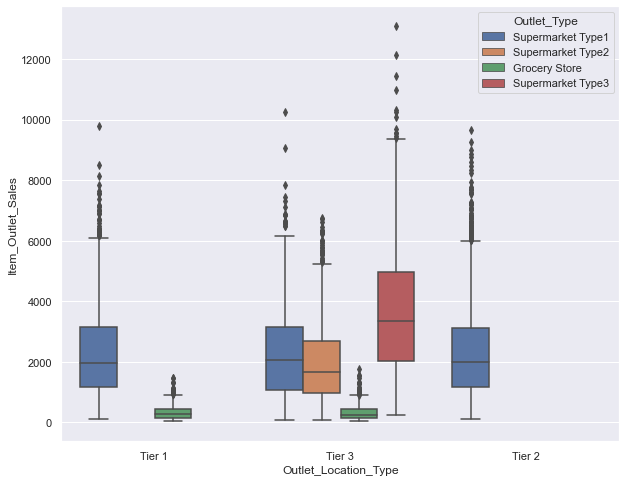

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=df)


As we can see, tier 3 locations seem to be selling better than both tier 2 and tier 1. It is also to be noted that tier 3 has more number of stores in it. Hence, the sales are better too.

# i) Correlation heatmap

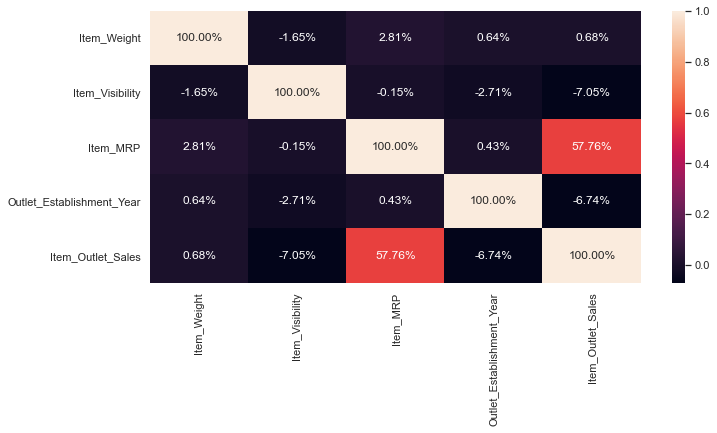

In [11]:
cor=df.corr()
plt.figure(figsize=(11,5))
sns.heatmap(cor,annot=True,fmt=".2%")

We can observe that the target variable i.e Item_Outlet_Sales is most dependent on Item_MRP and least dependent on Item_Weight

# Filling Missing Values

In [6]:
df["Item_Weight"].fillna(df["Item_Weight"].median(),inplace=True)
df["Outlet_Size"].fillna("Medium",inplace=True)

# Creation of New Features

In [7]:
df["Item_Identifier"]=df["Item_Identifier"].apply(lambda x : x[0:2])
df["Item_Identifier"].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [8]:
df["Item_Identifier"].replace({'FD':'Food','DR':'Drink','NC':'Non-Consumable'},inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,Food,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,Food,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,Non-Consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
df["age_of_store"]=2020-df["Outlet_Establishment_Year"]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,age_of_store
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
6,Food,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33
7,Food,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,Non-Consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


# Data Pre Processing :
## One Hot Encoding

In [10]:
df1=pd.get_dummies(df[["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Type","Outlet_Identifier","Outlet_Location_Type"]],drop_first=True)
df1

,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8519,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8520,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8521,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## Label Encoding

In [11]:
df2=df[["Outlet_Size"]]
#df2["Outlet_Location_Type"]=df["Outlet_Location_Type"].map({'Tier 3':3,'Tier 2':2,'Tier 1':1})
#df2["Outlet_Type"]=df2["Outlet_Type"].map({'Supermarket Type3':4,'Supermarket Type1':3,"Supermarket Type2":2,'Grocery Store':1})

In [12]:
df2["Outlet_Size"]=df["Outlet_Size"].map({'Medium':3,'High':2,'Small':1})
df2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Outlet_Size
0,3
1,3
2,3
6,2
7,3
...,...
8518,2
8519,3
8520,1
8521,3


# Numerical columns

In [13]:
df3=np.sqrt(df[["Item_Weight","Item_Visibility","Item_MRP"]])
df3

,Item_Weight,Item_Visibility,Item_MRP
0,3.049590,0.126678,15.805354
1,2.433105,0.138846,6.947604
2,4.183300,0.129461,11.900336
6,3.694591,0.112876,7.593339
7,3.549648,0.357029,10.380857
...,...,...,...
8518,2.620115,0.238293,14.646563
8519,2.894823,0.216754,10.399856
8520,3.255764,0.187580,9.226180
8521,2.685144,0.381078,10.155452


In [16]:
#b4 norm after norm curve

# Independent Variable of our dataset

In [14]:
x=pd.concat([df1,df3,df2],axis=1)
x

,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,3.049590,0.126678,15.805354,3
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.433105,0.138846,6.947604,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,4.183300,0.129461,11.900336,3
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.694591,0.112876,7.593339,2
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.549648,0.357029,10.380857,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.620115,0.238293,14.646563,2
8519,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,2.894823,0.216754,10.399856,3
8520,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,3.255764,0.187580,9.226180,1
8521,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.685144,0.381078,10.155452,3


# Dependent Variable of our dataset

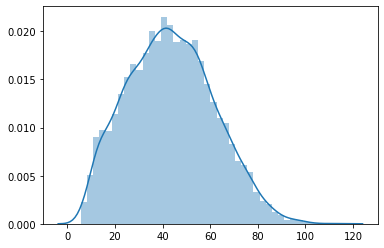

In [15]:
y=np.sqrt(df[["Item_Outlet_Sales"]])
sns.distplot(y)
#b4 norm after norm curve

In [145]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'age_of_store'],
      dtype='object')

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

# Model Building

In [18]:
from sklearn.linear_model import LinearRegression

In [22]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

LinearRegression()

In [23]:
reg_lin.score(X_test,y_test)

0.6621043289337308

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor(n_estimators=100,max_depth=3)
gbdt.fit(X_train,y_train)
gbdt.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6679248819785683

In [180]:
from sklearn.linear_model import BayesianRidge 
bs=BayesianRidge(n_iter=11,normalize=True)
bs.fit(X_train,y_train)
bs.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6621706278091748

In [110]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor( n_estimators=12,max_depth=7)


model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(max_depth=7, n_estimators=12)

In [111]:
model.score(X_test,y_test)

0.6728279434001172

In [154]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=6,splitter="best")
regr_1.fit(X_train,y_train)
regr_1.score(X_test,y_test)

0.669924922734797

In [173]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6320615385577473

# Model Evaluation

In [78]:
from sklearn.metrics import mean_squared_error

In [195]:
y_pred_lin=reg_lin.predict(X_test)
y_pred_gb=gbdt.predict(X_test)
y_pred_xgb=xgb_reg.predict(X_test)


Score=[['Linear_Regression',reg_lin.score(X_test,y_test)],['KNN_reg',knn.score(X_test,y_test)],['Random_Forest_reg',model.score(X_test,y_test)]]
a=np.sqrt(mean_squared_error(y_pred_xgb,y_test))



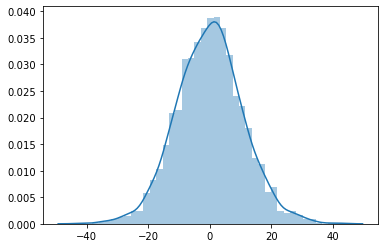

In [80]:
sns.distplot(y_pred_lin-y_test)

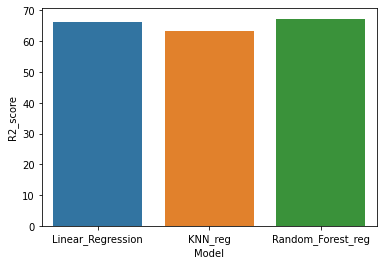

In [197]:
Sc=pd.DataFrame(Score,columns=['Model','R2_score'])
Sc["R2_score"]=Sc["R2_score"]*100
sns.barplot(x="Model",y="R2_score",data=Sc)